# Super Bowl Squares


## First notebook: Creating CSVs

<b>Project:</b> Super Bowl Squares Tableau Heat Map.

It's a gambling tradition to bet on Super Bowl squares, in which you pay for a square on a 10-x-10 grid, and based on a random drawing that square is assigned a digit from 0-9 for the AFC team's score and a digit from 0-9 for the NFC team's score. The digit represents the ones digit for the score. For example, if your square is 0 NFC and 7 AFC, and the score is Eagles 20, Chiefs 17 or Chiefs 27, Eagles 10, your square wins.

In this notebook, we created five CSVs that we'll concatenate into an 872 X 5 dataframe. The reason it's five separate CSVs is because we weren't allowed to scrape 872 tables in one session.

In [42]:
#Import libraries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import unidecode
import datetime as dt
from datetime import timedelta
from collections import Counter

# Copying and pasting, for now
We copied and pasted the table with every score occurrence in NFL history from <a hef="https://www.pro-football-reference.com/boxscores/game-scores.htm">Pro Football Reference</a>. Copying and pasting 1075 rows might be a little clumsy, but it's a chance to get around scraping for now. As we'll see later, we get thrown into scraping jail if we scrape too frequently.

In [43]:
nfl_scores_df = pd.read_csv('nflscores.csv')

In [44]:
nfl_scores_df.head()

,Rk,Score,PtsW,PtsL,PtTot,PD,Count,Unnamed: 7,Last Game
0,1,20-17,20,17,37,3,282,all games,Detroit Lions vs. New York Jets December 18 2022
1,2,27-24,27,24,51,3,230,all games,Kansas City Chiefs vs. Denver Broncos January ...
2,3,17-14,17,14,31,3,200,all games,Los Angeles Chargers vs. Tennessee Titans Dece...
3,4,23-20,23,20,43,3,199,all games,Kansas City Chiefs vs. Cincinnati Bengals Janu...
4,5,24-17,24,17,41,7,173,all games,Cincinnati Bengals vs. Baltimore Ravens Januar...


In [45]:
nfl_scores_df.tail()

,Rk,Score,PtsW,PtsL,PtTot,PD,Count,Unnamed: 7,Last Game
1070,1071,7-5,7,5,12,2,1,all games,Washington Redskins vs. Detroit Lions October ...
1071,1072,59-21,59,21,80,38,1,all games,Washington Redskins vs. Boston Yanks October 3...
1072,1073,72-41,72,41,113,31,1,all games,Washington Redskins vs. New York Giants Novemb...
1073,1074,33-9,33,9,42,24,1,all games,Washington Redskins vs. San Francisco 49ers No...
1074,1075,38-12,38,12,50,26,1,all games,Washington Redskins vs. New York Giants Octobe...


In [46]:
nfl_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rk          1075 non-null   int64 
 1   Score       1075 non-null   object
 2   PtsW        1075 non-null   int64 
 3   PtsL        1075 non-null   int64 
 4   PtTot       1075 non-null   int64 
 5   PD          1075 non-null   int64 
 6   Count       1075 non-null   int64 
 7   Unnamed: 7  1075 non-null   object
 8   Last Game   1075 non-null   object
dtypes: int64(6), object(3)
memory usage: 75.7+ KB


# Creating a Year column
Now let's extract the year from that Last Game string to create a Year column. We'll do this by slicing the last four characters of the Last Game string. Then we'll turn it into an integer.

In [47]:
nfl_scores_df['Year'] = nfl_scores_df['Last Game'].str[-4:]

In [48]:
nfl_scores_df.head()

,Rk,Score,PtsW,PtsL,PtTot,PD,Count,Unnamed: 7,Last Game,Year
0,1,20-17,20,17,37,3,282,all games,Detroit Lions vs. New York Jets December 18 2022,2022
1,2,27-24,27,24,51,3,230,all games,Kansas City Chiefs vs. Denver Broncos January ...,2023
2,3,17-14,17,14,31,3,200,all games,Los Angeles Chargers vs. Tennessee Titans Dece...,2022
3,4,23-20,23,20,43,3,199,all games,Kansas City Chiefs vs. Cincinnati Bengals Janu...,2023
4,5,24-17,24,17,41,7,173,all games,Cincinnati Bengals vs. Baltimore Ravens Januar...,2023


In [49]:
nfl_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rk          1075 non-null   int64 
 1   Score       1075 non-null   object
 2   PtsW        1075 non-null   int64 
 3   PtsL        1075 non-null   int64 
 4   PtTot       1075 non-null   int64 
 5   PD          1075 non-null   int64 
 6   Count       1075 non-null   int64 
 7   Unnamed: 7  1075 non-null   object
 8   Last Game   1075 non-null   object
 9   Year        1075 non-null   object
dtypes: int64(6), object(4)
memory usage: 84.1+ KB


In [50]:
nfl_scores_df['Year'] = pd.to_numeric(nfl_scores_df['Year'])

In [51]:
nfl_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075 entries, 0 to 1074
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rk          1075 non-null   int64 
 1   Score       1075 non-null   object
 2   PtsW        1075 non-null   int64 
 3   PtsL        1075 non-null   int64 
 4   PtTot       1075 non-null   int64 
 5   PD          1075 non-null   int64 
 6   Count       1075 non-null   int64 
 7   Unnamed: 7  1075 non-null   object
 8   Last Game   1075 non-null   object
 9   Year        1075 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 84.1+ KB


# Exploring the Year column
The years range from 1920 to 2023. That's a good thing. The histogram bins seem to increase as time goes on, with a sharp spike since 2020. That seems to make sense since the NFL started playing 16 games instead of 14 games in 1978 and then went to 17 games in 2021. Before the Super Bowl era, teams weren't even playing 14 games. Also, the Year column represents the most recent instance of each score, so the histogram should be skewed to more recent years.

In [52]:
print(max(nfl_scores_df['Year']), min(nfl_scores_df['Year']),)

2023 1920


In [53]:
import matplotlib.pyplot as plt

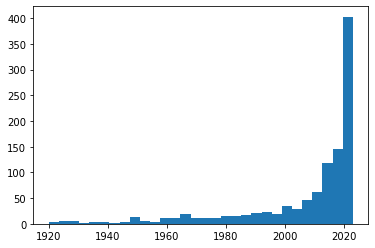

In [54]:
plt.hist(nfl_scores_df['Year'], bins = 30);

# Discarding all scores before 1994

We'll create a dataframe that only goes back to 1994. Why 1994? Because that was the first year the 2-point conversion was allowed in the NFL, so that affects scoring possibilities. If a team was down 28-20 before 1994, for example, and they scored a touchdown for six points, they didn't have the choice to go for two and tie it. They only could kick the extra point. So there would have been about a 90 percent chance that the score would end up being 28-27 after that TD. Now, if a team scores to TD to pull to within 28-26, they can go for two, which means instead of a 90 percent chance of a 28-27 score, there's about a 50-50 chance the score will be either 28-26 or 28-28.

In [55]:
since_1994 = nfl_scores_df[nfl_scores_df['Year'] >= 1994]

In [56]:
since_1994 = since_1994.sort_values(by = 'Year')

In [57]:
since_1994.head()

,Rk,Score,PtsW,PtsL,PtTot,PD,Count,Unnamed: 7,Last Game,Year
1056,1057,44-3,44,3,47,41,1,all games,San Francisco 49ers vs. New York Giants Januar...,1994
506,507,35-15,35,15,50,20,5,all games,San Diego Chargers vs. Seattle Seahawks Octobe...,1994
579,580,41-19,41,19,60,22,4,all games,Detroit Lions vs. Minnesota Vikings December 1...,1994
445,446,42-31,42,31,73,11,7,all games,Buffalo Bills vs. Miami Dolphins December 4 1994,1994
824,825,8-5,8,5,13,3,1,all games,Atlanta Falcons vs. Los Angeles Rams October 2...,1994


# Trimming one more
We'll take a look at all the scores that last occurred in 1994. Just from looking at the page in PFF, we know that first score is a playoff game in January of 1994, so that actually was before the 1994 season and 2-point conversions still weren't allowed. So we'll drop that row.

In [58]:
since_1994[since_1994['Year'] == 1994]

,Rk,Score,PtsW,PtsL,PtTot,PD,Count,Unnamed: 7,Last Game,Year
1056,1057,44-3,44,3,47,41,1,all games,San Francisco 49ers vs. New York Giants Januar...,1994
506,507,35-15,35,15,50,20,5,all games,San Diego Chargers vs. Seattle Seahawks Octobe...,1994
579,580,41-19,41,19,60,22,4,all games,Detroit Lions vs. Minnesota Vikings December 1...,1994
445,446,42-31,42,31,73,11,7,all games,Buffalo Bills vs. Miami Dolphins December 4 1994,1994
824,825,8-5,8,5,13,3,1,all games,Atlanta Falcons vs. Los Angeles Rams October 2...,1994
367,368,32-0,32,0,32,32,10,all games,Cleveland Browns vs. Arizona Cardinals Septemb...,1994
861,862,11-8,11,8,19,3,1,all games,Cleveland Browns vs. Houston Oilers October 13...,1994
978,979,40-8,40,8,48,32,1,all games,Philadelphia Eagles vs. San Francisco 49ers Oc...,1994


In [59]:
since_1994 = since_1994.drop(labels=1056, axis = 0)

In [60]:
since_1994[since_1994['Year'] == 1994]

,Rk,Score,PtsW,PtsL,PtTot,PD,Count,Unnamed: 7,Last Game,Year
506,507,35-15,35,15,50,20,5,all games,San Diego Chargers vs. Seattle Seahawks Octobe...,1994
579,580,41-19,41,19,60,22,4,all games,Detroit Lions vs. Minnesota Vikings December 1...,1994
445,446,42-31,42,31,73,11,7,all games,Buffalo Bills vs. Miami Dolphins December 4 1994,1994
824,825,8-5,8,5,13,3,1,all games,Atlanta Falcons vs. Los Angeles Rams October 2...,1994
367,368,32-0,32,0,32,32,10,all games,Cleveland Browns vs. Arizona Cardinals Septemb...,1994
861,862,11-8,11,8,19,3,1,all games,Cleveland Browns vs. Houston Oilers October 13...,1994
978,979,40-8,40,8,48,32,1,all games,Philadelphia Eagles vs. San Francisco 49ers Oc...,1994


In [61]:
since_1994.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 506 to 99
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rk          872 non-null    int64 
 1   Score       872 non-null    object
 2   PtsW        872 non-null    int64 
 3   PtsL        872 non-null    int64 
 4   PtTot       872 non-null    int64 
 5   PD          872 non-null    int64 
 6   Count       872 non-null    int64 
 7   Unnamed: 7  872 non-null    object
 8   Last Game   872 non-null    object
 9   Year        872 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 74.9+ KB


# Histogram since 1994
Pretty much tells the same story, except it dips sharply at the end. That's probably 2023 scores, since all we have from 2023 is the last two weeks of the 2022 regular season and the playoffs.

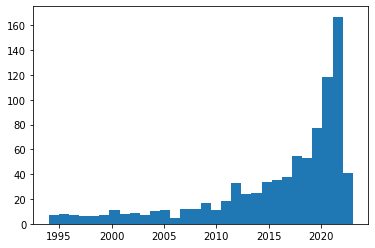

In [62]:
plt.hist(since_1994['Year'], bins = 30);

# Sorting by frequency
Now we'll sort the table by the count of scores again so that 20-17, the most frequent score in NFL history, is at the top. Then we'll create lists from the winning scores and losing scores columns and merge them into a list of tuples.

In [63]:
since_1994 = since_1994.sort_values(by = 'Count', ascending = False)

In [64]:
winning_scores = since_1994['PtsW'].values.tolist()

In [65]:
losing_scores = since_1994['PtsL'].values.tolist()

In [66]:
score_combos = [(winning_scores[i], losing_scores[i]) for i in range(len(winning_scores))]

In [67]:
score_combos[-40:]

[(36, 32),
 (52, 27),
 (58, 0),
 (49, 19),
 (59, 24),
 (13, 8),
 (49, 23),
 (46, 16),
 (59, 28),
 (39, 23),
 (36, 18),
 (46, 34),
 (23, 11),
 (56, 35),
 (48, 29),
 (54, 31),
 (33, 15),
 (49, 11),
 (51, 20),
 (49, 9),
 (39, 30),
 (54, 11),
 (22, 18),
 (51, 26),
 (54, 19),
 (48, 45),
 (37, 37),
 (53, 20),
 (45, 44),
 (43, 22),
 (36, 16),
 (43, 8),
 (51, 34),
 (26, 26),
 (39, 33),
 (28, 2),
 (56, 31),
 (55, 31),
 (51, 28),
 (53, 32)]

# Now for the scraping
I wrote the three functions below and have used them in other scraping projects. The indexing in the return of the get_headers function is customized depending on the project because we only really need relevant table headers at the top.

The next step is to extract the date of each dataframe we scrape so that we only count games since the 1994 season. Then all we'll need is the length of the dataframe to get the frequency of each score since 1994. 

The goal here is to create a dataframe with each row consisting of a winning score, a losing score, the last digit of the winning score, the last digit of the losing score and then the count of that score. 

We imported the time library to try to space out our scraping calls so we don't get shut down for too many scrapes. Then we created a list of the indexes for the score_combos tuples list because when we scrape, we need to fill in the blanks in the urls with a winning score and a losing score.

Then we have a giant for loop that we'll explain with comments.

We scraped the first 30 tables without using that for loop. Then we got the next 495 before our scraping session was terminated. Then we got 235 more and finally the last 112.

In [68]:
#Extracting all table header tags
def get_headers(table):
    headers = table.find_all('th')
    cols = []
    for header in headers:
        cols.append(header.get_text().strip('\t'))
    return cols[1:15] #This is a customized index because only the 2nd through the 15th th tags are needed

In [69]:
#Getting content of each cell
def get_content(table):
    content = table.find_all('td')
    table_content = []
    for item in content:
        table_content.append(item.get_text().strip(' '))
    table_content = [content.strip('\t') for content in table_content]  
    return table_content

In [70]:
#Dividing content by length of headers to get rows
def get_rows(cols, content):
    num_rows = len(content)/len(cols)
    content = iter(content)
    rows = []
    for i in range(int(num_rows)):
        new_row = []
        for j in range(len(cols)):
            new_row.append(next(content))
        rows.append(new_row)
    return rows

In [77]:
score_combos[871]

(53, 32)

In [72]:
import time

In [73]:
loop_rows = list(np.arange(760, 872, 14))

In [74]:
loop_rows

[760, 774, 788, 802, 816, 830, 844, 858]

In [75]:
#Scraping Pro Football Reference
list_of_rows = []
for a in range(len(loop_rows)): #The plan is to scrape 8 pages at a time (instead of 20, which got us shut down)
    loop_start = loop_rows[a] #This outer loops over the list of index numbers for the score_combos tuples list.
    loop_finish = loop_rows[a] + 14
    for i in range(loop_start, loop_finish):
        temp_row = []
        pff_string = 'https://www.pro-football-reference.com/boxscores/game_scores_find.cgi?pts_win='\
        + str(score_combos[i][0]) + '&pts_lose=' + str(score_combos[i][1])
        pff_page = requests.get(pff_string)
        pff_html_doc = pff_page.text
        pff_soup_obj = BeautifulSoup(pff_html_doc)
        tables = pff_soup_obj.find_all('table') #Extract the tables from the Beautiful Soup object. It's a list of one.
        headers = get_headers(tables[0]) #Calling first function. Getting table header (th) tags
        content = get_content(tables[0]) #Calling second function. Getting table data (td) tags
        rows = get_rows(headers, content) #Calling third function
        temp_df = pd.DataFrame(rows, columns = headers) #Creating a dataframe from the rows and headers
        temp_df['Date'] = pd.to_datetime(temp_df['Date'])
        temp_df = temp_df[temp_df['Date'] > '1994-06-01'] #Trimming the df to include only games since 1994 season started
        win_score = str(score_combos[i][0])
        lose_score = str(score_combos[i][1])
        #Creating a tuple from five variables, winning score, losing score, last digit of winning score,
        #last digit of losing score and length of our trimmed table
        #Then looping over that tuple to fill in temp_row
        #Then appending temp_row to list_of_rows
        row_tuple = win_score, lose_score, win_score[-1:], lose_score[-1:], len(temp_df)
        for j in range(len(row_tuple)):
            temp_row.append(row_tuple[j])
        list_of_rows.append(temp_row)
    print(f"Rows {loop_start}-{loop_finish} done")
    #Pausing for 60 seconds since according to Sports Reference, we can't scrape more than 20 times in a minute. 
    #We still had to run this loop four different times to get what we needed.
    time.sleep(60)

Rows 760-774 done
Rows 774-788 done
Rows 788-802 done
Rows 802-816 done
Rows 816-830 done
Rows 830-844 done
Rows 844-858 done
Rows 858-872 done


In [78]:
list_of_rows[:10], list_of_rows[-10:]

([['43', '12', '3', '2', 1],
  ['22', '8', '2', '8', 1],
  ['19', '5', '9', '5', 1],
  ['22', '15', '2', '5', 1],
  ['47', '30', '7', '0', 1],
  ['52', '25', '2', '5', 1],
  ['40', '22', '0', '2', 1],
  ['40', '35', '0', '5', 1],
  ['40', '15', '0', '5', 1],
  ['39', '13', '9', '3', 1]],
 [['36', '16', '6', '6', 1],
  ['43', '8', '3', '8', 1],
  ['51', '34', '1', '4', 1],
  ['26', '26', '6', '6', 1],
  ['39', '33', '9', '3', 1],
  ['28', '2', '8', '2', 1],
  ['56', '31', '6', '1', 1],
  ['55', '31', '5', '1', 1],
  ['51', '28', '1', '8', 1],
  ['53', '32', '3', '2', 1]])

In [79]:
len(list_of_rows)

112

# Converting to csv
The since_94_cols list is the column headers. Then we create a dataframe from the list of rows that the giant for loop produced. 

In [38]:
since_94_cols = ['WScore', 'LScore', 'WLastDig', 'LLastDig', 'Count']

In [76]:
last_112_df = pd.DataFrame(list_of_rows, columns = since_94_cols)
filepath = r'C:\Users\Owner\Tableau_Projects\Super_Bowl_Squares/last_112.csv'
last_112_df.to_csv(filepath)

In [72]:
len(since_1994)

872